In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [82]:
train = pd.read_csv("train.csv", index_col=0)
train.head(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [84]:
train.describe(exclude='float64')

,Brand,Material,Size,Laptop Compartment,Waterproof,Style,Color
count,290295,291653,293405,292556,292950,292030,290050
unique,5,4,3,2,2,3,6
top,Adidas,Polyester,Medium,Yes,Yes,Messenger,Pink
freq,60077,79630,101906,148342,148077,100031,51690


In [85]:
train.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


In [86]:
train.groupby(['Laptop Compartment', 'Waterproof'])['Price'].mean().to_frame().reset_index()

,Laptop Compartment,Waterproof,Price
0,No,No,81.569353
1,No,Yes,81.476518
2,Yes,No,81.692752
3,Yes,Yes,81.405880


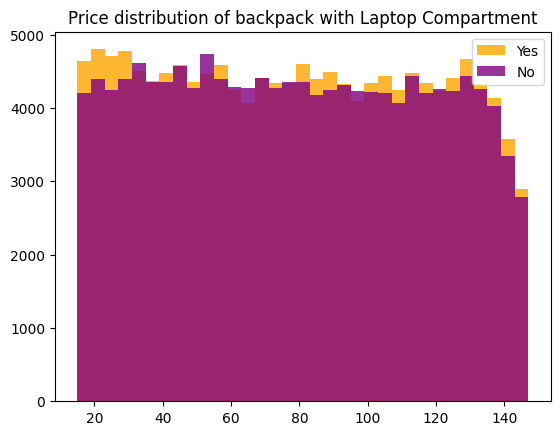

In [87]:
bins=np.arange(15, 150, 4)

plt.hist(train.loc[train['Laptop Compartment'] == 'Yes', 'Price'], color='orange', alpha=0.8, label='Yes', bins=bins)
plt.hist(train.loc[train['Laptop Compartment'] == 'No', 'Price'], color='purple', alpha=0.8, label='No', bins=bins)
plt.title('Price distribution of backpack with Laptop Compartment')
plt.legend()

plt.show()

---

In [88]:
train[train.select_dtypes(include='object').columns] = train.select_dtypes(include='object').fillna('Inconnu')
train[train.select_dtypes(include='number').columns] = train.select_dtypes(include='number').fillna(-1)
train.isna().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [89]:
gb = train.groupby(["Brand", "Material"])['Price'].mean().to_frame().sort_values(by='Price')
gb

,,Price
Brand,Material,
Inconnu,Inconnu,77.775788
Adidas,Leather,79.841314
Inconnu,Nylon,80.038115
Adidas,Nylon,80.049351
Inconnu,Leather,80.124717
Puma,Leather,80.361667
Nike,Leather,80.362421
Adidas,Inconnu,80.568979
Jansport,Leather,80.760899


Prices for both Brand and Material which are NA are pretty low. Combination is to implement.

---

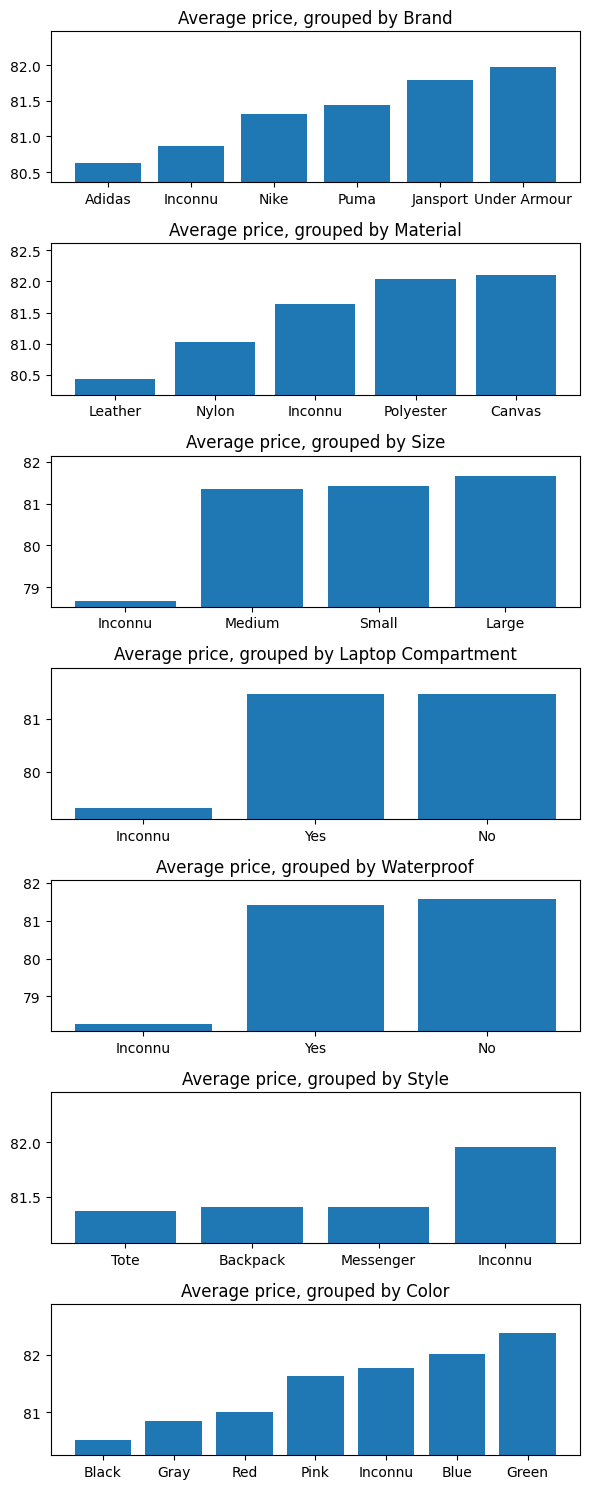

In [90]:
fig, ax = plt.subplots(len(train.select_dtypes(include='object').columns), 1, figsize=(6,15))
ax = ax.flatten()
count=0

for col in train.select_dtypes(include='object').columns:
    gb = train.groupby(col)['Price'].mean().to_frame().sort_values(by='Price')

    low, high = gb['Price'].quantile([0.02, 1])  # Garde les valeurs entre le 2e et 100e percentile
    ax[count].set_ylim(low - 0.3, high + 0.5)

    ax[count].set_title(f'Average price, grouped by {col}')
    ax[count].bar(x=gb.index, height=gb['Price'])

    count += 1
    
plt.tight_layout()

Inconnu give some good insight for Style, Waterproof, Laptop Compartment and Size !

---

In [91]:
train.select_dtypes(include='number').columns

Index(['Compartments', 'Weight Capacity (kg)', 'Price'], dtype='object')

In [92]:
gb = train.groupby('Compartments')['Price'].mean().to_frame()
gb

,Price
Compartments,
1.0,81.263845
2.0,81.171776
3.0,81.332909
4.0,81.969078
5.0,81.477310
6.0,81.452368
7.0,81.440569
8.0,81.906747
9.0,80.418818


(80.05435061932081, 82.46907765921645)

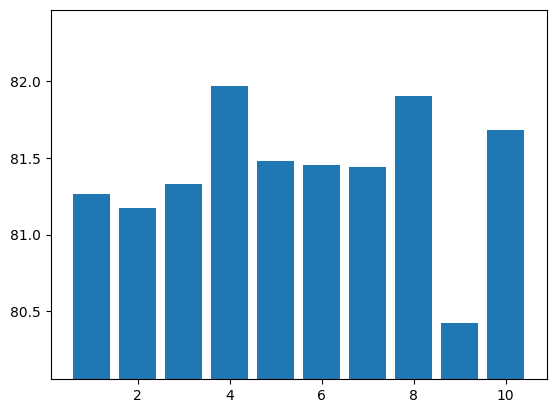

In [93]:
plt.bar(x=gb.index, height=gb['Price'])
low, high = gb['Price'].quantile([0.02, 1])
plt.ylim((low - 0.5, high + 0.5))

In [94]:
gb = train.groupby(['Weight Capacity (kg)'])['Price'].mean().to_frame()
gb

,Price
Weight Capacity (kg),
-1.000000,62.660329
5.000000,78.304714
5.004444,132.156440
5.008382,143.890560
5.009731,144.075910
...,...
29.996888,117.151670
29.997986,68.255628
29.998925,104.765930


---

In [95]:
work_on_weight_cap = train.copy()

In [96]:
work_on_weight_cap['Weight Capacity (kg)'] = round(train['Weight Capacity (kg)'], 0)
work_on_weight_cap.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,12.0,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.0,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,17.0,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,13.0,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,18.0,86.02312


In [97]:
gb = work_on_weight_cap.groupby('Weight Capacity (kg)')['Price'].mean().to_frame()
gb

,Price
Weight Capacity (kg),
-1.0,62.660329
5.0,77.631680
6.0,77.658844
7.0,79.971050
8.0,79.432499
9.0,79.874311
10.0,80.557975
11.0,81.278439
12.0,81.906175


<BarContainer object of 27 artists>

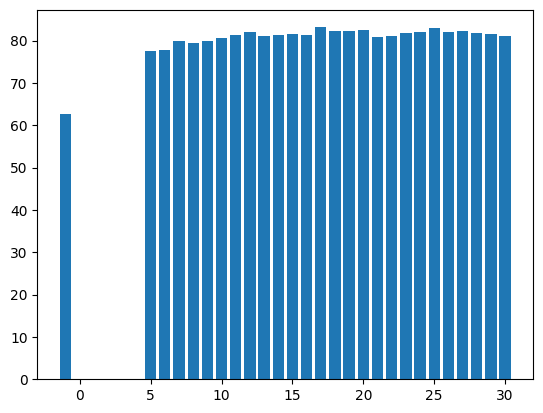

In [98]:
plt.bar(x=gb.index, height=gb['Price'])

ZOOM ON NON-MISSING VALUES :

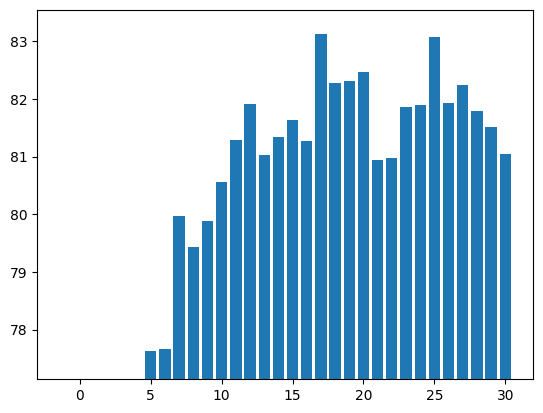

In [99]:
plt.bar(x=gb.index, height=gb['Price'])
low, high = gb['Price'].quantile([0.05, 0.96])
plt.ylim((low - 0.5, high + 0.5))

plt.show()

Maybe add a squared feature for weight capacity.

---

VIZ ON COLUMN COMBINATION IN PAIRS

In [117]:
import json

with open('best_combinations_22_02.json', 'r') as json_file:
    relevant_combinations = json.load(json_file)

In [118]:
first_thirty = list(relevant_combinations.items())[:30]

In [119]:
nb_of_combinations_better_that_no_adding_any_column = ([value[1] < relevant_combinations['no_column_added'] for value in list(relevant_combinations.items())]).count(0)
nb_of_combinations_better_that_no_adding_any_column

755

In [120]:
x = np.arange(0, len(list(relevant_combinations.items())), 1)
y = [value[1] for value in list(relevant_combinations.items())]

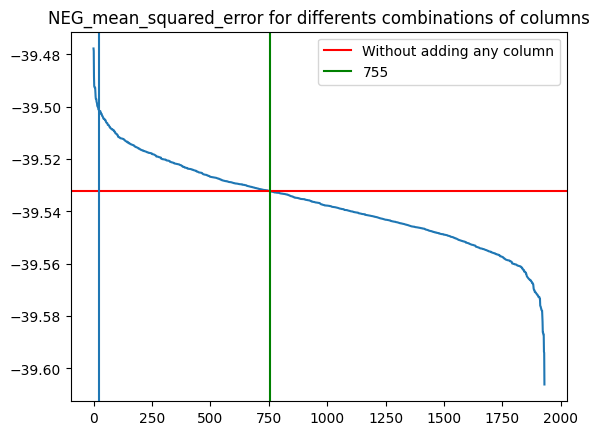

In [121]:
plt.plot(x, y)
plt.axhline(relevant_combinations['no_column_added'], label="Without adding any column", color='red')
plt.axvline(nb_of_combinations_better_that_no_adding_any_column, label=str(nb_of_combinations_better_that_no_adding_any_column), color='green')
plt.axvline(25)

plt.title('NEG_mean_squared_error for differents combinations of columns')

plt.legend()
plt.show()

Text(0.5, 1.0, "Gradient of the error as a fonction of the combinations' rank (sorted)")

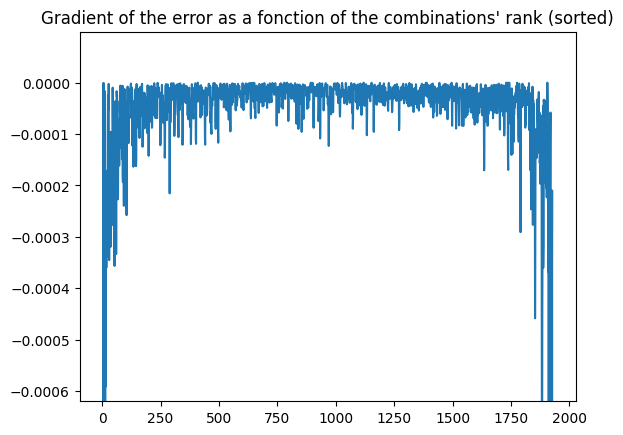

In [105]:
low, high = pd.Series(np.gradient(y, x)).quantile([0.01, 0.98])

plt.plot(x, np.gradient(y, x))
plt.ylim((low, high + 0.0001))
#plt.axhline(-0.00042)
#plt.axvline(50, color='red')
plt.title("Gradient of the error as a fonction of the combinations' rank (sorted)")

---

VIZ ON INTERACTIONS BY COMBINATIONS THREE COLUMNS

In [122]:
import json

with open('best_combinations_in_trio_25_02.json', 'r') as json_file:
    relevant_combinations = json.load(json_file)

In [123]:
first_thirty = list(relevant_combinations.items())[:30]

In [124]:
nb_of_combinations_better_that_no_adding_any_column = ([value[1] < relevant_combinations['no_column_added'] for value in list(relevant_combinations.items())]).count(0)
nb_of_combinations_better_that_no_adding_any_column

4822

In [125]:
x = np.arange(0, len(list(relevant_combinations.items())), 1)
y = [value[1] for value in list(relevant_combinations.items())]

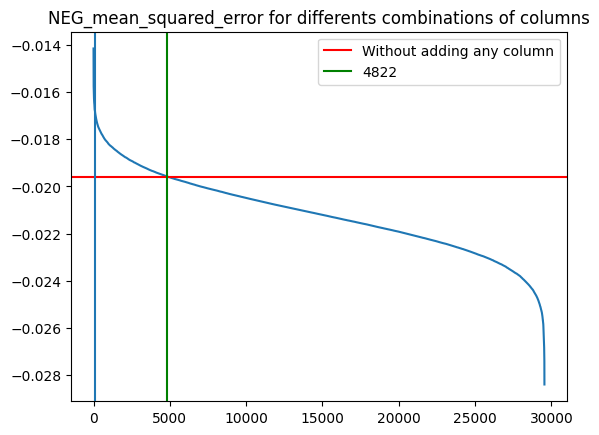

In [126]:
plt.plot(x, y)
plt.axhline(relevant_combinations['no_column_added'], label="Without adding any column", color='red')
plt.axvline(nb_of_combinations_better_that_no_adding_any_column, label=str(nb_of_combinations_better_that_no_adding_any_column), color='green')
plt.axvline(100)

plt.title('NEG_mean_squared_error for differents combinations of columns')

plt.legend()
plt.show()

Text(0.5, 1.0, "Gradient of the error as a fonction of the combinations' rank (sorted)")

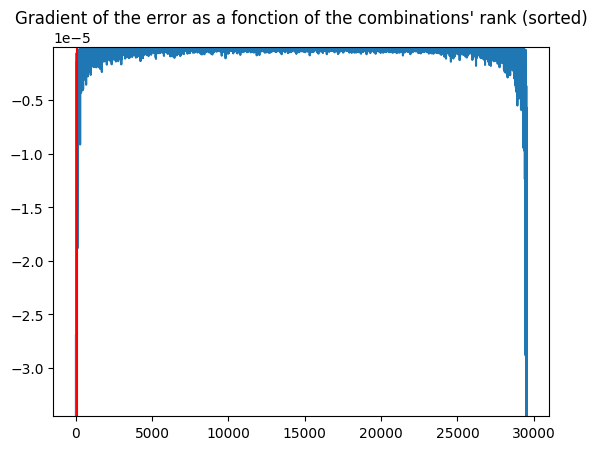

In [127]:
low, high = pd.Series(np.gradient(y, x)).quantile([0.001, 0.99])

plt.plot(x, np.gradient(y, x))
plt.ylim((low, high))
#plt.axhline(-0.00042)
plt.axvline(100, color='red')
plt.title("Gradient of the error as a fonction of the combinations' rank (sorted)")